<a href="https://colab.research.google.com/github/MohanPatil1/DS-And-DA-Assignments/blob/main/_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# KNN Classification
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

dataframe = read_csv(filename,names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [5]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Apply Minmax Scaling
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [7]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [8]:
num_folds = 10
kfold = KFold(n_splits=10)

In [9]:
model = KNeighborsClassifier(n_neighbors=17)
results=cross_val_score(model,X,Y,cv=kfold)

In [10]:
results

array([0.67532468, 0.83116883, 0.67532468, 0.67532468, 0.77922078,
       0.77922078, 0.80519481, 0.84415584, 0.72368421, 0.77631579])

In [11]:
print(results.mean())

0.7564935064935066


# Grid Search for Algorithm Tunning

In [12]:
# Grid Search for Algorithm 
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [14]:
filename = '/content/pima-indians-diabetes.data.csv'
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

dataframe = read_csv(filename,names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [15]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [16]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [17]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [19]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [20]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


# Visualization the Cv results

In [25]:
# Search for an optimal Value of k for KNN
k_range = range(1,41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X,Y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

16    0.755297
17    0.755280
13    0.753913
15    0.752614
21    0.750120
20    0.750068
22    0.747522
18    0.747471
11    0.747368
24    0.746206
19    0.746189
14    0.744805
23    0.743592
9     0.743472
37    0.742259
34    0.742242
12    0.742208
6     0.739627
39    0.738397
38    0.738380
8     0.738346
7     0.738312
26    0.737081
32    0.737064
35    0.737030
10    0.736945
33    0.735748
36    0.735731
5     0.735714
30    0.734450
25    0.733168
28    0.731852
31    0.731852
27    0.730537
29    0.725359
4     0.721377
3     0.718712
1     0.712235
2     0.703059
0     0.679665
dtype: float64

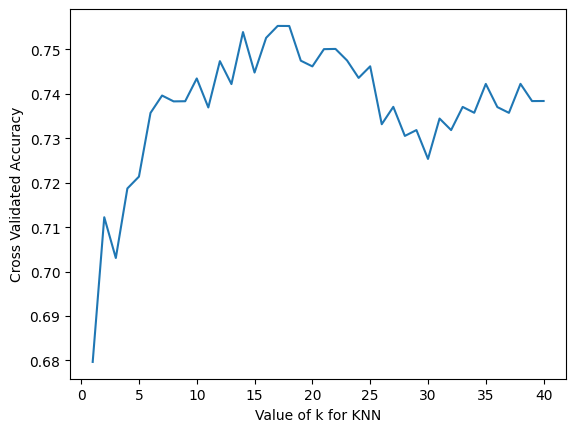

In [26]:
import matplotlib.pyplot as plt
plt.plot(k_range,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross Validated Accuracy')
plt.show()